In [3]:
pip install ISLP

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/3.6 MB 3.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.3/3.6 MB 3.5 MB/s eta 0:00:01
   ---- ----------------------------------- 0.4/3.6 MB 3.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.6/3.6 MB 3.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.7/3.6 MB 2.8 MB/s eta 0:00:02
   -------- ------------------------------- 0.8/3.6 MB 3.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.9/3.6 MB 2.9 MB/s eta 0:00:01
   ----------- ---------------------------- 1.0/3.6 MB 2.9 MB/s eta 0:00:01
   ------------ --------------------------- 1.2/3.6 MB 2.9 MB/s eta 0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.1 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.



   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  212.5/212.5 MB 2.7 MB/s eta 0:00:01
   ------------------------------------

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.datasets import get_rdataset
from ISLP import load_data

from sklearn.cluster import (KMeans, AgglomerativeClustering)
from ISLP.cluster import compute_linkage

In [83]:
np.random.seed(0)
X = np.random.standard_normal((50,2))
X[:25,0] += 3
X[:25, 1] -=4

In [97]:
kmeans = KMeans(n_clusters=2, random_state=2, n_init=20).fit(X)

C:\Users\yasir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [98]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

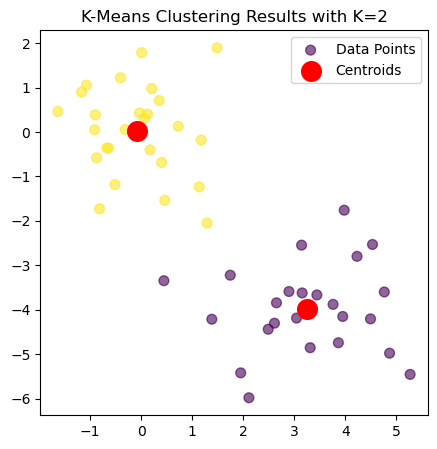

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Scatter plot of data points (colored by cluster)
ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, alpha=0.6, label='Data Points')

# Plot centroids (red crosses or any distinct marker)
ax.scatter(
    kmeans.cluster_centers_[:, 0],  # X-coordinates of centroids
    kmeans.cluster_centers_[:, 1],  # Y-coordinates of centroids
    s=200,                          # Size of centroid markers
    marker='o',                     # Marker style (X, *, o, etc.)
    color='red',                    # Color of centroids
    linewidths=1,                   # Thickness of marker edges
    label='Centroids'               # Label for legend
)

ax.set_title('K-Means Clustering Results with K=2')
ax.legend()  # Show legend to distinguish data points and centroids
plt.show()

C:\Users\yasir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering Results with K=3')

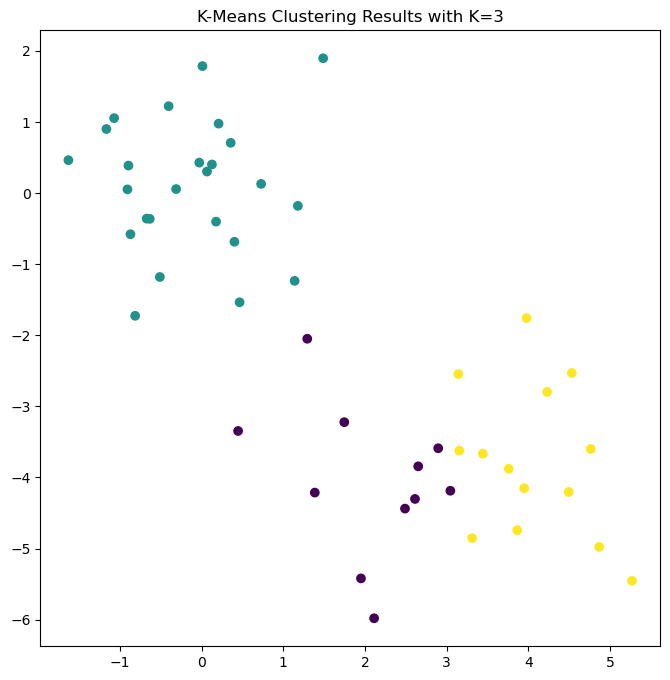

In [103]:
kmeans = KMeans(n_clusters=3, random_state=3, n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title('K-Means Clustering Results with K=3')

In [107]:
kmeans1 = KMeans(n_clusters=3, random_state=3, n_init=1).fit(X)
kmeans2 = KMeans(n_clusters=3, random_state=3, n_init=30).fit(X)
kmeans1.inertia_, kmeans2.inertia_

C:\Users\yasir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yasir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(76.85131986999251, 75.03508259100438)